In [19]:
import os
import sys
import pandas as pd
import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.append('/opt/ros/melodic/lib/python2.7/dist-packages')
sys.path.append('/home/martin/Control/h_rcom_vs_ws/devel/lib/python2.7/dist-packages')

# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
prefix = '/home/martin/.ros'
# prefix = '../data'

In [20]:
df_mpd = pd.read_pickle(os.path.join(prefix, 'mean_pairwise_distance.pkl'))
df_mpd['mean_pairwise_distance'] = df_mpd['mean_pairwise_distance'].apply(lambda x: x.data)
df_mpd

,mean_pairwise_distance
0,1.618049
1,51.206463
2,50.872192
3,50.872192
4,50.872192
...,...
616,9.196977
617,7.285460
618,7.285460
619,8.645316


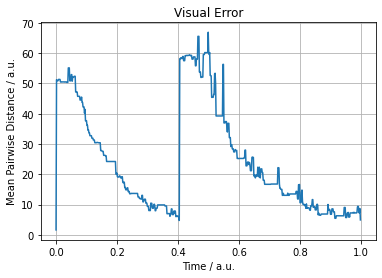

In [21]:
plt.plot(df_mpd.index/len(df_mpd), df_mpd.mean_pairwise_distance)
plt.title('Visual Error')
plt.xlabel('Time / a.u.')
plt.ylabel('Mean Pairwise Distance / a.u.')
plt.grid()
# plt.show()
plt.savefig('visual_error.pdf')

# fig = px.line(df_mpd, x=df_mpd.index, y='mean_pairwise_distance')
# fig.show()

In [22]:
df_fb = pd.read_pickle(os.path.join(prefix, 'h_rcom_vs_feedback.pkl'))

# compute euclidean distance on trocar position error
df_fb['p_trocar_error_euclidean_distance'] = df_fb['rcomFeedback'].apply(
    lambda x: 
        np.linalg.norm(np.array([x.errors.p_trocar.position.x, x.errors.p_trocar.position.y, x.errors.p_trocar.position.z])*1.e3)
)

print(df_fb['rcomFeedback'][0])
df_fb

states: 
  task: 
    values: [0.00017198016627059586, -0.0002908737262301047, -0.0002874744685092583, 1.8588124676219448e-05]
    is_velocity: True
  p_trocar: 
    position: 
      x: 0.8646568584286055
      y: 0.12275620463305886
      z: 0.1904747189142892
    is_empty: False
errors: 
  task: 
    values: [0.09982801983372941, 0.0002908737262301047, 0.0002874744685092583, -1.8588124676219449e-06]
    is_velocity: True
  p_trocar: 
    position: 
      x: 0.0019360748513505
      y: 0.0011012850184828477
      z: -0.004430003013002642
    is_empty: False


,rcomFeedback,p_trocar_error_euclidean_distance
0,states: \n task: \n values: [0.00017198016...,4.958441
1,states: \n task: \n values: [-0.0033422821...,4.536938
2,states: \n task: \n values: [-0.0027274184...,3.782887
3,states: \n task: \n values: [-0.0033666649...,2.753973
4,states: \n task: \n values: [-0.0038411717...,2.294620
...,...,...
957,states: \n task: \n values: [-0.0001508389...,0.192900
958,states: \n task: \n values: [-0.0001725982...,0.181324
959,states: \n task: \n values: [4.23992650141...,0.180414
960,states: \n task: \n values: [2.28712541827...,0.179476


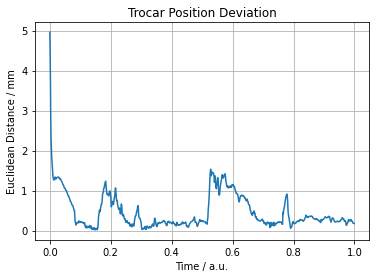

In [23]:
plt.plot(df_fb.index/len(df_fb), df_fb.p_trocar_error_euclidean_distance)
plt.title('Trocar Position Deviation')
plt.xlabel('Time / a.u.')
plt.ylabel('Euclidean Distance / mm')
plt.grid()
# plt.show()
plt.savefig('trocar_position_deviation.pdf')

# fig = px.line(df_fb, x=df_fb.index, y='p_trocar_error_eucledian_norm')
# fig.show()

In [24]:
df_rcom_state = pd.read_pickle(os.path.join(prefix, 'rcom_state.pkl'))

df_rcom_state['tip_error_euclidean_distance'] = df_rcom_state['rcom'].apply(lambda x:
    np.sqrt(
        (x.task.values[0] - df_rcom_state['rcom'][0].task.values[0])**2 +
        (x.task.values[1] - df_rcom_state['rcom'][0].task.values[1])**2 +
        (x.task.values[2] - df_rcom_state['rcom'][0].task.values[2])**2
    )*1.e3
)

# df_rcom_state['x'] = df_rcom_state['rcom'].apply(lambda x: abs(x.task.values[0] - df_rcom_state['rcom'][0].task.values[0])*1.e3)
# df_rcom_state['y'] = df_rcom_state['rcom'].apply(lambda x: abs(x.task.values[1] - df_rcom_state['rcom'][0].task.values[1])*1.e3)
# df_rcom_state['z'] = df_rcom_state['rcom'].apply(lambda x: abs(x.task.values[2] - df_rcom_state['rcom'][0].task.values[2])*1.e3)

# delete column
df_rcom_state = df_rcom_state.drop(['rcom'], axis=1)
df_rcom_state

,tip_error_euclidean_distance
0,0.000000
1,0.000110
2,0.000166
3,0.000172
4,0.000193
...,...
1231,2.744824
1232,2.744821
1233,2.744830
1234,2.744773


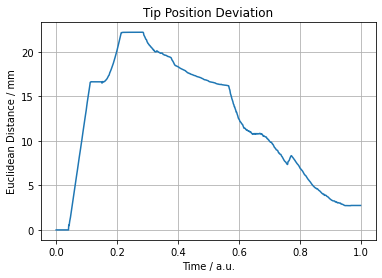

In [25]:
plt.plot(df_rcom_state.index/len(df_rcom_state), df_rcom_state.tip_error_euclidean_distance)

plt.title('Tip Position Deviation')
plt.xlabel('Time / a.u.')
plt.ylabel('Euclidean Distance / mm')
plt.grid()
# plt.legend()
# plt.show()
plt.savefig('tip_position_deviation.pdf')


# fig = go.Figure()

# for key, col in df_rcom_state.iteritems():
#     fig.add_trace(
#         go.Scatter(x=col.index, y=df_rcom_state[key], mode='lines', name=key)
#     )

# fig.show()

In [26]:
df_twist = pd.read_pickle(os.path.join(prefix, 'twist.pkl'))

# split df
df_twist['linear.x']  = df_twist['Twist'].apply(lambda x: x.linear.x)
df_twist['linear.y']  = df_twist['Twist'].apply(lambda x: x.linear.y)
df_twist['linear.z']  = df_twist['Twist'].apply(lambda x: x.linear.z)
df_twist['angular.x'] = df_twist['Twist'].apply(lambda x: x.angular.x)
df_twist['angular.y'] = df_twist['Twist'].apply(lambda x: x.angular.y)
df_twist['angular.z'] = df_twist['Twist'].apply(lambda x: x.angular.z)

# delete column
df_twist = df_twist.drop(['Twist'], axis=1)
df_twist

,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.000000e-01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
2,0.000000e+00,-1.000000e-01,0.000000,0.000000e+00,0.000000e+00,0.000000
3,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
4,7.045704e-05,3.939242e-02,-0.039719,-1.773423e-01,1.630635e-02,0.003593
...,...,...,...,...,...,...
618,-3.123314e-03,5.276533e-04,-0.004005,-5.344094e-03,5.393364e-03,-0.001653
619,-3.037613e-03,8.632939e-04,-0.004072,-3.139826e-02,-1.384974e-02,0.002254
620,-3.037613e-03,8.632939e-04,-0.004072,-3.139826e-02,-1.384974e-02,0.002254
621,-2.777186e-03,8.692684e-04,-0.006904,-4.060868e-02,-1.197184e-02,-0.000445


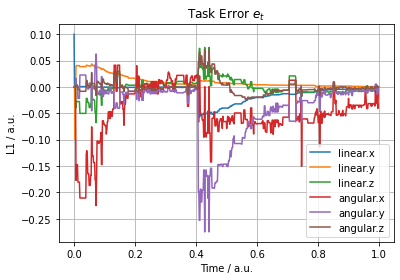

In [27]:
for key, col in df_twist.iteritems():
    plt.plot(col.index/len(col), df_twist[key], label=key)

plt.title('Task Error $e_t$')
plt.xlabel('Time / a.u.')
plt.ylabel('L1 / a.u.')
plt.grid()
plt.legend()
# plt.show()
plt.savefig('task_error.pdf')

# fig = go.Figure()

# for key, col in df_twist.iteritems():
#     fig.add_trace(
#         go.Scatter(x=col.index, y=df_twist[key], mode='lines', name=key)
#     )

# fig.update_layout(title=r'$\text{Task Error}\,\,e_\text{t}$', xaxis_title='Iteration / #')

# fig.write_image('test.pdf')